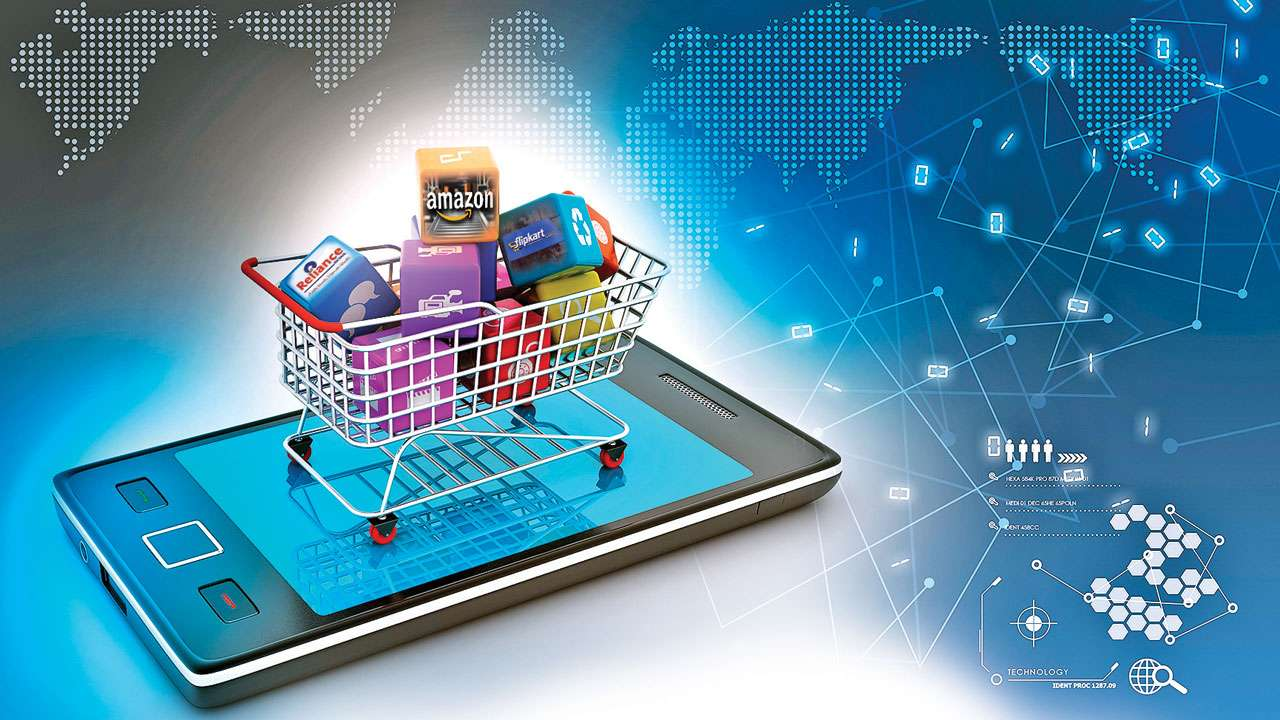


## The Challenge

You are part of a Data Scientists team from the All In One Place company, that needs to determine who are the clients eligible to participate of the “Insiders Program”. With this clients list on hand, the marketing team will a sequency of a custom and exclusive actions for this group, in order to rise the revenues and the purchase frequency. 
As result for this project is expected that you deliver a list with eligible clients to participate of the “Insiders Program”, as well a report answering the following questions:

1. Who are the elegible people to participate in the “Insiders Program”?
2. How many clients will be part of the group?
3. Which are the main caracteristics for the group?
4. Which is the revenues percentage that comes from the group?
5. Which are the expected revenues from this group for the next months?
6. Which are the conditions to a client be eligible for the “Insiders”?
7. Which are the conditions to a client be removed from the “Insiders”?
8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
9. Which actions the marketing team can perform in order to improve the income?

## The Data

The data set is available on the Kaggle platform, through this link:

https://www.kaggle.com/vik2012kvs/high-value-customers-identification

Each row represents a sell transaction that happened between November 2016 and December 2017. The dataset includes the following informations:

• **Invoice Number:** unique id from each purchase.

• **Stock Code Product:** item code.

• **Description Product:** item name.

• **Quantity:** the quantity of each item purchased per transaction.

• **Invoice Date:** the day that the purchase occurred.

• **Unit Price:** product price per unit.

• **Customer ID:** client id.

• **Country:** the client country.

# Soluction Planning

### IOT Planning

#### Input



1. Businnes Problem
    - Select the high value customers.
    
2. Dataset.
    - Sales in a 1 year period.

#### Output



1. Customers identification for Insiders Program.
    - Insiders Programs Customers list.
    
2. Report.
    - Businnes questions answers. 
    
        1. Who are the elegible people to participate in the “Insiders Program”?
        2. How many clients will be part of the group?
        3. Which are the main caracteristics for the group?
        4. Which is the revenues percentage that comes from the group?
        5. Which are the expected revenues from this group for the next months?
        6. Which are the conditions to a client be eligible for the “Insiders”?
        7. Which are the conditions to a client be removed from the “Insiders”?
        8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
        9. Which actions the marketing team can perform in order to improve the income?

#### Tasks

1. Who are the elegible people to participate in the “Insiders Program”?
    - What is a "elegible customer" for the businnes?
        - Revenues
            - High AVG Ticket (AVG purchase value)
            - High LTV (Total purchase values)
            - Low recence (how oft the customer make a purchase)
            - High basket size.
            - Low churning probability.
            - High LTV prediction.
            - High propensity to buy.
            
        - Cost
            - Low return rate.
                        
        - Shopping experience
            - High AVG evaluation.
            
            
            
2. How many clients will be part of the group?
    - There is a limit of customer for the Insiders Program?
    - GRoup percentage.
    
    
3. Which are the main caracteristics for the group?
    - Age.
    - Location.
    - See question 1
    
4. Which is the revenues percentage that comes from the group?
    - Total year revenues.
    - Total Insiders group revenues.
    - Comparation.
    
5. Which are the expected revenues from this group for the next months?
    - Insiders group LVT.
    - Cohort analysis - time customer marker.

6. Which are the conditions to a client be eligible for the “Insiders”?
    - Define the model frequency 1, month, 2?, 3?)
    - The customers must to be similar
    
7. Which are the conditions to a client be removed from the “Insiders”?
    - Define the model frequency 1, month, 2?, 3?)
    - The customers must to be dissimilar from insiders.
    
8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
    - A/B test
    - A/B Beysian test 
    - Hipotesys tests.
9. Which actions the marketing team can perform in order to improve the income?
    - Discount.
    - Buy preference.
    - Free deliver.

#### Benchmark Solutions

1. Desk Research

    1. RFM Model
        - Recency
            - Time since the last purchase.
            - Responsivity.
           
        - Frequency
            - Avg time between transactions.
            - Engagement
            
        - Monetary
            - Total spend, revenues.
            - High value purchases.
            
Step 1
    - Order the groups by a feature.
    
Step 2
    - Divided the customers according to notes.
        - Notes between 1 - 5.
        - 5 groups
        
Step 3
    - Same as step  with other feature.
    
Step 4
    - Do the same with the last feature.
    
Step 5
    - Do the mean between the features scores.
    
    2. RFM Model segmentation
        Categorize customers by the RFM model.

# Imports, Configurations and Helper Functions

## Imports

In [1]:
import dash
import plotly
import random
import warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

## Configurations

In [112]:
warnings.filterwarnings('ignore')

SEED = 43

%matplotlib inline
%pylab inline

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 18

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.expand_frame_repr', False)

sns.set()

plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot

pd.options.display.float_format = '{:.2f}'.format

Populating the interactive namespace from numpy and matplotlib


## Helper Functions

# Load Data

In [3]:
data_path = r'C:\Users\felip\repos\pa005_insiders_clustering\insiders_clustering\data\raw\Ecommerce.csv'

df_init = pd.read_csv(data_path)
df_init.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [4]:
len(df_init[df_init["Quantity"] < 0])

10624

# Data Fist Look

In [5]:
print(f'\nROWS: {df_init.shape[0]}\n\nCOLUMNS: {df_init.shape[1]}.\n')


ROWS: 541909

COLUMNS: 9.



In [6]:
df_init.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Unnamed: 8     541909
dtype: int64

In [7]:
df_init.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Unnamed: 8     float64
dtype: object

In [8]:
df_init.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0
Unnamed: 8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## First Look Summary.

<span style="color:blue">1. The columns "Unnamed: 8" have no value to the dataset and should be droped.<span>
    
<span style="color:blue">2. The columns are in a weird order - reorder the columns..<span>
    
<span style="color:blue">3. The column "InvoiceDate" should be "DATE" type.<span>
    
<span style="color:blue">4. The columns "InvoiceNo" should be "INT" type.<span>
    
<span style="color:blue">5. There are some NaN values at the "Description" and "CustomerID".<span>   
    
<span style="color:blue">6. Check for discrepant information and outliers<span>

# Data Cleaning

In [9]:
df_init_2 = df_init.copy()

### <span style="color:blue">1. The columns "Unnamed: 8" have no value to the dataset and should be droped.<span> - DONE

In [10]:
df_init_2.drop(columns = 'Unnamed: 8', inplace = True)

In [11]:
df_init_2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


### <span style="color:blue">2. The columns are in a weird order - reorder the columns.<span> - DONE

In [12]:
df_init_2 = df_init_2[['CustomerID', 'Country', 'InvoiceDate','InvoiceNo', 'Description', 'UnitPrice', 'StockCode', 'Quantity']]
df_init_2.head()

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity
0,17850.0,United Kingdom,29-Nov-16,536365,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123A,6
1,17850.0,United Kingdom,29-Nov-16,536365,WHITE METAL LANTERN,3.39,71053,6
2,17850.0,United Kingdom,29-Nov-16,536365,CREAM CUPID HEARTS COAT HANGER,2.75,84406B,8
3,17850.0,United Kingdom,29-Nov-16,536365,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,84029G,6
4,17850.0,United Kingdom,29-Nov-16,536365,RED WOOLLY HOTTIE WHITE HEART.,3.39,84029E,6


### <span style="color:blue">3. The column "InvoiceDate" should be "DATE" type.<span> - DONE

In [13]:
df_init_2['InvoiceDate'] = pd.to_datetime(df_init_2['InvoiceDate'])

In [14]:
df_init_2.dtypes

CustomerID            float64
Country                object
InvoiceDate    datetime64[ns]
InvoiceNo              object
Description            object
UnitPrice             float64
StockCode              object
Quantity                int64
dtype: object

In [15]:
df_init_2.head()

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity
0,17850.0,United Kingdom,2016-11-29,536365,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123A,6
1,17850.0,United Kingdom,2016-11-29,536365,WHITE METAL LANTERN,3.39,71053,6
2,17850.0,United Kingdom,2016-11-29,536365,CREAM CUPID HEARTS COAT HANGER,2.75,84406B,8
3,17850.0,United Kingdom,2016-11-29,536365,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,84029G,6
4,17850.0,United Kingdom,2016-11-29,536365,RED WOOLLY HOTTIE WHITE HEART.,3.39,84029E,6


### <span style="color:blue">4. The columns "InvoiceNo" should be "INT" type.<span> - DONE
    
    - It was found some codes like "C536379" and it cant be directly tranformed into "INT" type.
    - The "C" before the numbers represents a "Discount" description.
    - It was separated the letter in the code from the numbers and creted a separated column for them - maybe they can be important later.
        - Column "some_code": 
    
        X - there was no letter before the number code.
        [C, A] - The letter code before the number.
    

In [16]:
len(df_init_2[df_init_2['Quantity'] < 0])

10624

In [17]:
print(f'There are {len(df_init_2.set_index("Description").loc["Discount"])} rows with "Discount" InvoiceNo "C" code, and maybe other types of InvoiceNo with letters')

There are 77 rows with "Discount" InvoiceNo "C" code, and maybe other types of InvoiceNo with letters


In [18]:
print(f'There are {len(df_init_2["Description"].unique())} diferent unique products descriptions.')
print(f'There are {len(df_init_2["StockCode"].unique())} diferent unique stock codes.')
print(f'There are {len(df_init_2["InvoiceNo"].unique())} diferent unique Invoice Numbers.')

There are 4224 diferent unique products descriptions.
There are 4070 diferent unique stock codes.
There are 25900 diferent unique Invoice Numbers.


In [19]:
normal = []
not_normal = []

In [20]:
for x in df_init_2['InvoiceNo']:
    if len(x) == 6:
        normal.append(x)
    else:
        not_normal.append(x)

In [21]:
print(f'There are {len(not_normal)} "InvoiceNo" with some letter before the numbers')

There are 9291 "InvoiceNo" with some letter before the numbers


In [22]:
# Created the "SOME_CODE" column, to split the "InvoiceNo" from some code before the numbers.

df_init_2['some_code'] = df_init_2['InvoiceNo'].apply(lambda x: "X" if len(x) == 6 else x[0])

In [23]:
# Separated the code (letter) before some "InvouceNo" from the number itself.

df_init_2['InvoiceNo'] = df_init_2['InvoiceNo'].apply(lambda x: x if len(x) == 6 else x[1:])

In [24]:
df_init_2.sample(5)

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity,some_code
106361,13166.0,United Kingdom,2017-02-27,545327,WOODEN SCHOOL COLOURING SET,1.65,22561,6,X
301381,17958.0,United Kingdom,2017-08-13,563259,JUMBO BAG VINTAGE DOILY,2.08,23203,2,X
534467,16426.0,United Kingdom,2017-12-05,581147,LUNCH BAG VINTAGE LEAF DESIGN,1.65,23208,5,X
318155,NaN,United Kingdom,2017-08-28,564825,LUNCH BAG RED RETROSPOT,4.13,20725,1,X
180046,14507.0,United Kingdom,2017-05-06,552298,WOOD BLACK BOARD ANT WHITE FINISH,7.95,82484,2,X


In [25]:
df_init_2['some_code'].value_counts()

X    532618
C      9288
A         3
Name: some_code, dtype: int64

In [26]:
# Tranformed df_init_2['InvoiceNo'] into INTEGER.

df_init_2['InvoiceNo'] = df_init_2['InvoiceNo'].astype(int)

In [27]:
print(f'There are {len(df_init_2[df_init_2["UnitPrice"] < 0])} negative prices at the dataset.')

There are 2 negative prices at the dataset.


In [28]:
print(f'There are {len(df_init_2[df_init_2["Quantity"] < 0])} rows with negative quantity.')

There are 10624 rows with negative quantity.


### <span style="color:blue">5. There are some NaN values at the "Description" and "CustomerID".<span> - DONE
    
    - There are 135080 NaNs at the CustomerID column, almost 25% of all the dataset.
    
    OPTIONS:
    - input an ID for these customers based on the invoice number - each invoice number belongs to a customer.
    
    FINAL DECISION:
    - After some analysis, it was understood that the NaN values at the columns CustomerID and Description are not relevant for the future clustering model training. 
      It was decided to mantein the rows with NaN values.

In [29]:
df_init_2.isna().sum()

CustomerID     135080
Country             0
InvoiceDate         0
InvoiceNo           0
Description      1454
UnitPrice           0
StockCode           0
Quantity            0
some_code           0
dtype: int64

In [30]:
print(f'There are {df_init_2["CustomerID"].isna().sum()} rows with no data at the CustomerID column - ' 
      f'{round(df_init_2["CustomerID"].isna().sum()/len(df_init_2)*100, 2)}% of all dataset.')

There are 135080 rows with no data at the CustomerID column - 24.93% of all dataset.


In [31]:
print(f'There are {len(df_init_2["CustomerID"].unique())} unique customers ID in the dataset.')
print(f'There are {len(df_init_2["InvoiceNo"].unique())} invoice numbers in the dataset.')
print(f'\nThere are {len(df_init_2["InvoiceNo"].unique()) / len(df_init_2["CustomerID"].unique()):.2f} Invoice No for each CustomerID')

There are 4373 unique customers ID in the dataset.
There are 25900 invoice numbers in the dataset.

There are 5.92 Invoice No for each CustomerID


In [32]:
df_customer_NaN = df_init_2.set_index('CustomerID').loc[NaN]
df_customer_NaN.shape

(135080, 8)

In [33]:
df_customer_NaN['InvoiceNo'].value_counts().count()

3710

In [34]:
display(df_init_2.head())
display(df_init_2.tail())

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity,some_code
0,17850.0,United Kingdom,2016-11-29,536365,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123A,6,X
1,17850.0,United Kingdom,2016-11-29,536365,WHITE METAL LANTERN,3.39,71053,6,X
2,17850.0,United Kingdom,2016-11-29,536365,CREAM CUPID HEARTS COAT HANGER,2.75,84406B,8,X
3,17850.0,United Kingdom,2016-11-29,536365,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,84029G,6,X
4,17850.0,United Kingdom,2016-11-29,536365,RED WOOLLY HOTTIE WHITE HEART.,3.39,84029E,6,X


,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity,some_code
541904,12680.0,France,2017-12-07,581587,PACK OF 20 SPACEBOY NAPKINS,0.85,22613,12,X
541905,12680.0,France,2017-12-07,581587,CHILDREN'S APRON DOLLY GIRL,2.10,22899,6,X
541906,12680.0,France,2017-12-07,581587,CHILDRENS CUTLERY DOLLY GIRL,4.15,23254,4,X
541907,12680.0,France,2017-12-07,581587,CHILDRENS CUTLERY CIRCUS PARADE,4.15,23255,4,X
541908,12680.0,France,2017-12-07,581587,BAKING SET 9 PIECE RETROSPOT,4.95,22138,3,X


### <span style="color:blue">6. Check for discrepant information and outliers - DONE<span>
    
    - many of the data are not sales themselves, they can be shipping, postage, and other situations that are not sales.
   ~~- 14107 rows were excluded - 2.6% of the dataset.~~
    
    - "Negative quantity" are devolution and should be maintained in the dataset, so we will return them to the dataset.

In [35]:
df_init_2.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0
InvoiceNo,541909.0,559946.967325,13421.287454,536365.00,547896.00,560601.00,571779.00,581587.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0


<AxesSubplot:xlabel='UnitPrice'>

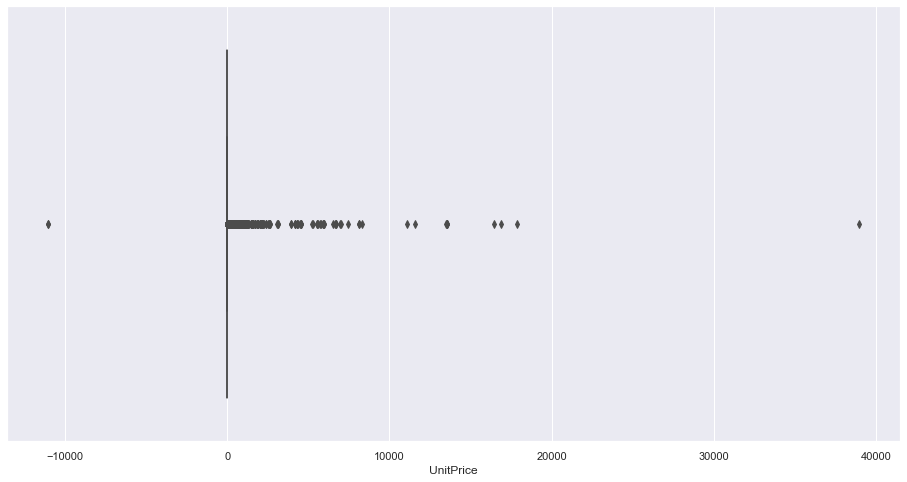

In [36]:
sns.boxplot(df_init_2['UnitPrice'])

In [37]:
print(f'There are {len(df_init_2[df_init_2["UnitPrice"] < 0])} negative prices at the dataset.')

There are 2 negative prices at the dataset.


In [38]:
df_init_2[df_init_2["UnitPrice"] < 0]

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity,some_code
299983,NaN,United Kingdom,2017-08-10,563186,Adjust bad debt,-11062.06,B,1,A
299984,NaN,United Kingdom,2017-08-10,563187,Adjust bad debt,-11062.06,B,1,A


In [39]:
# Seeing the prices = 0

print(f'There are {len(df_init_2[df_init_2["UnitPrice"] == 0])} prices equal to zero at the dataset.')

There are 2515 prices equal to zero at the dataset.


In [40]:
# Excluding negative prices and prices == 0.

df_init_2 = df_init_2[df_init_2["UnitPrice"] > 0]

In [41]:
df_init_2["UnitPrice"].min()

0.001

In [42]:
df_init_2[df_init_2["UnitPrice"] < 0.01]

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity,some_code
157195,13952.0,United Kingdom,2017-04-13,550193,PADS TO MATCH ALL CUSHIONS,0.001,PADS,1,X
279045,15618.0,United Kingdom,2017-07-24,561226,PADS TO MATCH ALL CUSHIONS,0.001,PADS,1,X
359871,16198.0,United Kingdom,2017-09-23,568200,PADS TO MATCH ALL CUSHIONS,0.001,PADS,1,X
361741,13405.0,United Kingdom,2017-09-24,568375,Bank Charges,0.001,BANK CHARGES,1,X


In [43]:
# Excluging prices lower them 0.01.

df_init_2 = df_init_2[df_init_2["UnitPrice"] > 0.01]

In [44]:
df_init_2[df_init_2["UnitPrice"] > 10000]

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity,some_code
15016,NaN,United Kingdom,2016-12-05,537630,AMAZON FEE,13541.33,AMAZONFEE,-1,C
15017,NaN,United Kingdom,2016-12-05,537632,AMAZON FEE,13541.33,AMAZONFEE,1,X
16232,NaN,United Kingdom,2016-12-05,537644,AMAZON FEE,13474.79,AMAZONFEE,-1,C
16356,NaN,United Kingdom,2016-12-05,537651,AMAZON FEE,13541.33,AMAZONFEE,-1,C
43702,NaN,United Kingdom,2017-01-03,540117,AMAZON FEE,16888.02,AMAZONFEE,-1,C
43703,NaN,United Kingdom,2017-01-03,540118,AMAZON FEE,16453.71,AMAZONFEE,-1,C
222681,15098.0,United Kingdom,2017-06-08,556445,Manual,38970.00,M,-1,C
299982,NaN,United Kingdom,2017-08-10,563185,Adjust bad debt,11062.06,B,1,A
524601,NaN,United Kingdom,2017-12-03,580604,AMAZON FEE,11586.50,AMAZONFEE,-1,C
524602,NaN,United Kingdom,2017-12-03,580605,AMAZON FEE,17836.46,AMAZONFEE,-1,C


In [45]:
df_init_2.shape

(539387, 9)

In [46]:
df_init_2[df_init_2['UnitPrice'] > 5000].head()

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity,some_code
15016,NaN,United Kingdom,2016-12-05,537630,AMAZON FEE,13541.33,AMAZONFEE,-1,C
15017,NaN,United Kingdom,2016-12-05,537632,AMAZON FEE,13541.33,AMAZONFEE,1,X
16232,NaN,United Kingdom,2016-12-05,537644,AMAZON FEE,13474.79,AMAZONFEE,-1,C
16313,NaN,United Kingdom,2016-12-05,537647,AMAZON FEE,5519.25,AMAZONFEE,-1,C
16356,NaN,United Kingdom,2016-12-05,537651,AMAZON FEE,13541.33,AMAZONFEE,-1,C


In [47]:
df_init_2.set_index('Description').loc['Manual'].head()

,CustomerID,Country,InvoiceDate,InvoiceNo,UnitPrice,StockCode,Quantity,some_code
Description,,,,,,,,
Manual,16274.0,United Kingdom,2016-11-29,536569,1.25,M,1,X
Manual,16274.0,United Kingdom,2016-11-29,536569,18.95,M,1,X
Manual,NaN,United Kingdom,2016-12-01,536865,2.55,M,1,X
Manual,14723.0,United Kingdom,2016-12-01,536981,0.85,M,2,X
Manual,17062.0,United Kingdom,2016-12-03,537077,0.42,M,12,X


In [48]:
print(f'There are {len(df_init_2.query("Quantity < 0"))} rows at "df_init_2" with negative quantities (devolutions)')

print(f'\nThere are {len(df_init_2.set_index("Description").loc["AMAZON FEE"])} rows that are "AMAZON FEE", they are not sales.')

print(f'\nThere are {len(df_init_2.set_index("Description").loc["POSTAGE"])} rows as "POSTAGE" description and as the Amazon fees, they are not sales.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "DOTCOM POSTAGE"])} "DOTCOM POSTAGE" values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Manual"])} "Manual" values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Adjust bad debt"])} "Adjust bad debt "values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Bank Charges"])} "Bank Charges" values. It can not be included as sale.')

print(f'\nThere was found many products description as "Manual", with diferent prices - total rows: {len(df_init_2.set_index("Description").loc["Manual"])} - it seems to be not normal sales.')

print(f'\nThere was found many products description as "CARRIAGE", with diferent prices - total rows: {len(df_init_2.set_index("Description").loc["CARRIAGE"])} - it are not a sales.')

print(f'\nThere are {len(df_init_2[df_init_2["Description"] == "CRUK Commission"])} rows as "CRUK Commission". It seems to be some kind of commission and are not sales.')

print(f'\n\n"C" some_code: {len(df_init_2.set_index("some_code").loc["C"])}\nQuantity < 0: {len(df_init_2.query("Quantity < 0"))}')
print('\n"C" code represents returns, negative values in the "Quantity" feature.')

There are 9287 rows at "df_init_2" with negative quantities (devolutions)

There are 34 rows that are "AMAZON FEE", they are not sales.

There are 1252 rows as "POSTAGE" description and as the Amazon fees, they are not sales.

It was found 707 "DOTCOM POSTAGE" values. It can not be included as sale.

It was found 566 "Manual" values. It can not be included as sale.

It was found 1 "Adjust bad debt "values. It can not be included as sale.

It was found 36 "Bank Charges" values. It can not be included as sale.

There was found many products description as "Manual", with diferent prices - total rows: 566 - it seems to be not normal sales.

There was found many products description as "CARRIAGE", with diferent prices - total rows: 143 - it are not a sales.

There are 16 rows as "CRUK Commission". It seems to be some kind of commission and are not sales.


"C" some_code: 9287
Quantity < 0: 9287

"C" code represents returns, negative values in the "Quantity" feature.


In [49]:
print(len(df_init_2.set_index("Description").loc["AMAZON FEE"]))
print(len(df_init_2.set_index("Description").loc["POSTAGE"]))
print(len(df_init_2.set_index("Description").loc["Manual"]))
print(len(df_init_2.set_index("Description").loc["Adjust bad debt"]))
print(len(df_init_2.set_index("Description").loc["Bank Charges"]))
print(len(df_init_2.set_index("Description").loc["DOTCOM POSTAGE"]))
print(len(df_init_2.set_index("Description").loc["CARRIAGE"]))
print(len(df_init_2[df_init_2["Description"] == "CRUK Commission"]))

34
1252
566
8
36
707
143
16


In [50]:
# Separating the dataset into 2 datasets - sales and not sales.

df_not_sales = df_init_2.query('Description == ["POSTAGE", "AMAZON FEE", "Manual", "Adjust bad debt", "Bank Charges", "DOTCOM POSTAGE","CARRIAGE","CRUK Commission"]')
df_only_sales = df_init_2.query('Description != ["POSTAGE", "AMAZON FEE", "Manual", "Adjust bad debt", "Bank Charges", "DOTCOM POSTAGE","CARRIAGE", "CRUK Commission"]')

print(df_not_sales.shape)
print(df_only_sales.shape)

(2755, 9)
(536632, 9)


In [51]:
print(f'There are {len(df_only_sales.query("Quantity < 0"))} rows that are products returns at the sales dataset.')

There are 8841 rows that are products returns at the sales dataset.


In [52]:
len(df_only_sales.set_index("some_code").loc["C"])

8841

In [53]:
df_only_sales["some_code"].unique()

array(['X', 'C'], dtype=object)

In [54]:
len(df_only_sales) - len(df_init_2)

-2755

In [55]:
df_only_sales.describe()

,CustomerID,InvoiceNo,UnitPrice,Quantity
count,404952.000000,536632.000000,536632.000000,536632.000000
mean,15295.180446,559968.930828,3.300576,9.884930
std,1710.327851,13426.421476,5.371075,215.927255
min,12346.000000,536365.000000,0.030000,-80995.000000
25%,13969.000000,547903.000000,1.250000,1.000000
50%,15159.000000,560694.000000,2.080000,3.000000
75%,16794.000000,571828.000000,4.130000,10.000000
max,18287.000000,581587.000000,1867.860000,80995.000000


<AxesSubplot:xlabel='UnitPrice'>

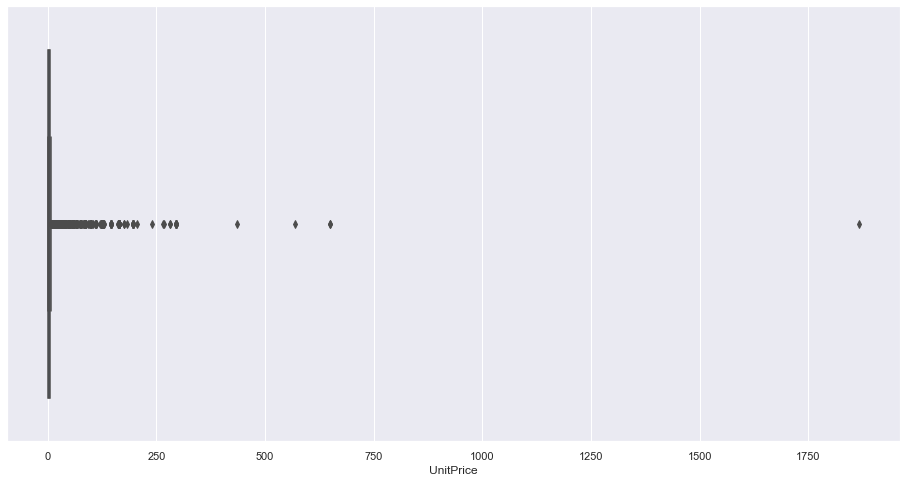

In [56]:
sns.boxplot(df_only_sales["UnitPrice"])

In [57]:
display(df_only_sales.set_index('UnitPrice').loc[df_only_sales["UnitPrice"].max()])
display(df_only_sales.set_index('UnitPrice').loc[df_only_sales["UnitPrice"].min()])

CustomerID                 17940.0
Country             United Kingdom
InvoiceDate    2017-04-06 00:00:00
InvoiceNo                   549452
Description               Discount
StockCode                        D
Quantity                        -1
some_code                        C
Name: 1867.86, dtype: object

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,StockCode,Quantity,some_code
UnitPrice,,,,,,,,
0.03,15838.0,United Kingdom,2016-11-30,536757,ROTATING SILVER ANGELS T-LIGHT HLDR,84347,-9360,C
0.03,12901.0,United Kingdom,2017-05-08,552569,Discount,D,-240,C


In [58]:
len(df_only_sales.query('Description == ["Discount", "SAMPLES"]'))

139

In [59]:
print(f'Since our first look at the dataset we have excluded {df_init.shape[0] - df_only_sales.shape[0]} rows - {((df_init.shape[0] - df_only_sales.shape[0]) / df_init.shape[0]) * 100:.2f}% of the original dataset.')

Since our first look at the dataset we have excluded 5277 rows - 0.97% of the original dataset.


# Data Engineering

In [60]:
df = df_only_sales.copy()

In [61]:
# Creating YEAR, MONTH and DAY_OF_WEEK Features.

# Year
df['InvoiceYear'] = df['InvoiceDate'].dt.year

# Month
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Weekday
df['InvoiceDayWeek'] = df['InvoiceDate'].dt.weekday

# Total purchase value
df['TotalValue'] = df['UnitPrice'] * df['Quantity']

df.sample(5)

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity,some_code,InvoiceYear,InvoiceMonth,InvoiceDayWeek,TotalValue
323934,NaN,United Kingdom,2017-08-31,565378,WOODLAND CHARLOTTE BAG,2.46,20719,28,X,2017,8,3,68.88
186060,12649.0,Germany,2017-05-09,552844,GYMKHANA TREASURE BOOK BOX,2.25,23194,8,X,2017,5,1,18.00
140424,17088.0,United Kingdom,2017-03-29,548405,CREAM SWEETHEART MINI CHEST,12.75,85066,2,X,2017,3,2,25.50
176989,13081.0,United Kingdom,2017-05-04,552039,LUNCH BAG PINK POLKADOT,1.65,22384,20,X,2017,5,3,33.00
525786,15033.0,United Kingdom,2017-12-03,580637,12 PENCIL SMALL TUBE WOODLAND,0.65,20973,3,X,2017,12,6,1.95


In [62]:
# Reordering columns
df = df[['CustomerID',	'Country', 'InvoiceNo', 'InvoiceDate', 'Description', 'StockCode', 'UnitPrice', 'Quantity', 'TotalValue', 'some_code', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDayWeek']]

# Changing "some_code" to "SomeCode"
df.columns = ['CustomerID',	'Country', 'InvoiceNo', 'InvoiceDate', 'Description', 'StockCode', 'UnitPrice', 'Quantity', 'TotalValue', 'SomeCode', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDayWeek']

In [63]:
print(f'First dataset purchase: {df["InvoiceDate"].min()}.')
print(f'Last dataset purchase: {df["InvoiceDate"].max()}.')

First dataset purchase: 2016-11-29 00:00:00.
Last dataset purchase: 2017-12-07 00:00:00.


In [64]:
# Total sales at the first day of the dataset.

len(df.set_index("InvoiceDate").loc[df["InvoiceDate"].min()])

3090

In [65]:
# Total sales at the last day of the dataset.

len(df.set_index("InvoiceDate").loc[df["InvoiceDate"].max()])

1624

## Building RFM Model

In [198]:
# last Invoice Since (days)
# Today - it was used the day after the last day into the dataset.

today = pd.to_datetime('2017-12-08')

df['days_since_last_purchase'] = today - df['InvoiceDate']

# Transforming 'days_since_last_purchase' into iteger.
df['days_since_last_purchase'] = df['days_since_last_purchase'].apply(lambda x: x.days)

# Recency Score
# 5 - last 30 days. 4 - last 60 days. 3 - last 90 days. 2 - last 120 days. 1 - more tham 120 days.
df['recency'] = df['days_since_last_purchase'].apply(lambda x: 5 if x <= 30 else 4 if x > 30 and x <= 60 else 3 if x > 60 and x <= 90 else 2 if x > 90 and x <= 120 else 1)

# Frequency Score
# 5 - > 1000 purchases. 4 - <1000 and > 500 purchases. 3 - <500 and > 200 purchases. 2 - <200 and >100 purchases. 1 <100 purchases.
df['frequency'] = df['CustomerID'].map(dict(df['CustomerID'].value_counts()))
df['frequency'] = df['frequency'].apply(lambda x: 5 if x >= 1000 else 4 if x < 1000 and x >= 500 else 3 if x < 500 and x >= 200 else 2 if x < 200 and x >= 100 else 1)


# RFM Score
# After some feature enginnering it was decided to make a separated dataframe from RFM model.

# Building a DataFrame just for RFM.

recency = df.groupby('CustomerID')['recency'].max()
frequency = df.groupby('CustomerID')['frequency'].max()
monetary = df.groupby('CustomerID')['TotalValue'].sum()

df_RFM_score = pd.DataFrame([recency, frequency, monetary]).T

# creating "monetary_score" feature.
df_RFM_score['TotalValue'] = df_RFM_score['TotalValue'].apply(lambda x: 5 if x >= 10000 else 4 if x < 10000 and x >= 5000 else 3 if x < 5000 and x >= 1000 else 2 if x < 1000 and x >= 500 else 1)

# Reset index - Changing columns manes
df_RFM_score.reset_index(inplace = True)
df_RFM_score.columns = ['CustomerID', 'recency_score', 'frequency_score', 'monetary_score']

# Converting d types as INT. 
df_RFM_score['recency_score'] = df_RFM_score['recency_score'].astype(int)
df_RFM_score['frequency_score'] = df_RFM_score['frequency_score'].astype(int)

# creating "RFM score" feature.
df_RFM_score['RFM_score'] = (df_RFM_score['recency_score'] + df_RFM_score['frequency_score'] + df_RFM_score['monetary_score']) / 3

In [207]:
df_RFM_score.sort_values('RFM_score', ascending = False).head()

,CustomerID,recency_score,frequency_score,monetary_score,RFM_score
1699,14646.00,5,5,5,5.00
1670,14606.00,5,5,5,5.00
1790,14769.00,5,5,5,5.00
3792,17511.00,5,5,5,5.00
1341,14156.00,5,5,5,5.00


In [201]:
df_RFM_score['RFM_score'].value_counts()

1.00    873
2.33    631
2.67    486
2.00    481
3.00    467
1.67    377
3.33    325
1.33    290
3.67    221
4.00    121
4.33     54
4.67     22
5.00     14
Name: RFM_score, dtype: int64

## RFM Clusterization

# EDA

### Some Questions:

- What year was relatively the best for sales?

- Which month is the best for sales?

- Which day of is was the best for sales?

- Which season is the best for sales?

- Top 10 product sales by quantity and values.

- Top 10 countryes - with and without England.

- Top 10 cheapest/expensive products.

- Sales proportion by prices.

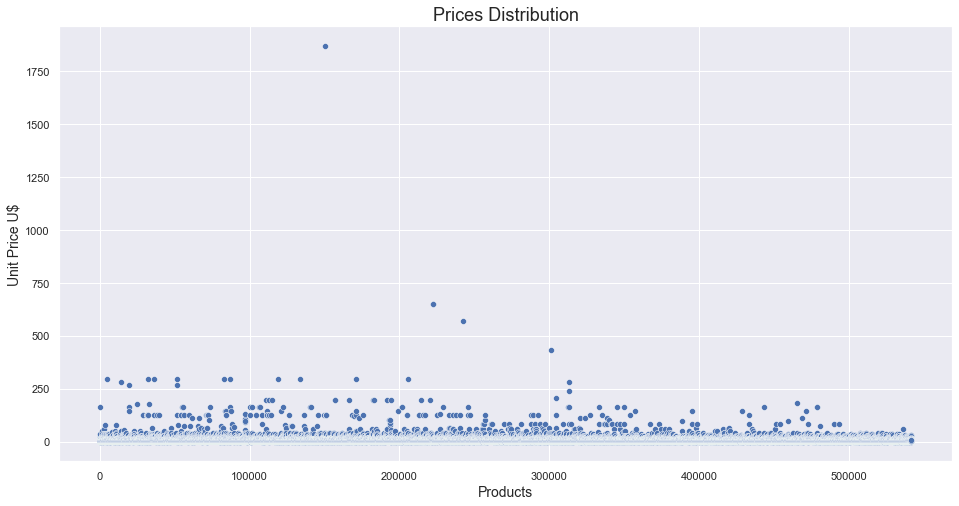

In [67]:
# Prices Distribution.

sns.scatterplot(x = df.index, y = df['UnitPrice'])
plt.title('Prices Distribution', fontsize = 18)
plt.xlabel('Products', fontsize = 14)
plt.ylabel('Unit Price U$', fontsize = 14);

In [68]:
year_group = df.groupby('InvoiceYear')['TotalValue'].mean()
year_group = pd.DataFrame(year_group)
year_group.reset_index(inplace = True)
year_group

,InvoiceYear,TotalValue
0,2016,18.075945
1,2017,18.246840


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,404952.0,15295.180446,1710.327851,12346.00,13969.00,15159.00,16794.00,18287.00
InvoiceNo,536632.0,559968.930828,13426.421476,536365.00,547903.00,560694.00,571828.00,581587.00
UnitPrice,536632.0,3.300576,5.371075,0.03,1.25,2.08,4.13,1867.86
Quantity,536632.0,9.884930,215.927255,-80995.00,1.00,3.00,10.00,80995.00
TotalValue,536632.0,18.233457,367.904178,-168469.60,3.75,9.78,17.40,168469.60
InvoiceYear,536632.0,2016.921687,0.268663,2016.00,2017.00,2017.00,2017.00,2017.00
InvoiceMonth,536632.0,7.494967,3.498267,1.00,5.00,8.00,11.00,12.00
InvoiceDayWeek,536632.0,2.662758,2.126433,0.00,1.00,2.00,5.00,6.00


# Work Diary

30/03/2021 - Kick off PA05.

    - done data load.
    - done first look at the data.
    - done some data cleaning.
        - found some issues with NaN in the data.
        
            - InvoiceNo.
            - CustomerID.
            - Description.
            

31/03/2021 - Git config + ClientID NaN problem.

    - Done GitLab configurations.
    - Openned my branch at GitLab repo.
    
    - Try to figure out how to use the NaN CustomerID - I do not want to drop them.
        - had an idea - use the Invoice Number to relate the purchases with the NaN clients, so we can input a clientID for each Invoice Number.
            - We can input the new CustomerID numbers above the CustomerID.max() - 18287.0 - but it can also create fake clients.
            - (01/04 - After some analysis, it was understood that the NaN values at the columns CustomerID and Description are not relevant for the future clustering model training. 
            It was decided to mantein the rows with NaN values.

01/04/2021 - More Data Cleaning.

    - Solved the "InvoiceNo" issue.

02/04/2021 - Finished first cicle of Data Cleaning.

    - Found a lot of data that did not correspond to sales itself.
    - Found some data as shipping charges, taxes, postage... They were all excluded, i tried to maintain only actual sales at the dataset.

06/04/2021 - returned to data cleaning.

    - Weekly 01 - After some considerations was observed that negative sales quantities are actually devolutions, and this data is important. I've returned them to the dataset.
    - the notebook "c1.0-fdv-end-to-end-clustering-W1" was duplicated in order to mantein the previous work. It meybe useful.

07/04/2021 - Still data cleaning.

    - Done some notebook organization.
    - Returned the negative sales quantityes back to the dataset.

10/04/2021 - Feature Enginnering

    - Done some feature enginnering.
    - Builded RFM model.